FOR DATA LOADING AND DISPLAYING 

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate  # Ensure 'tabulate' is installed
import matplotlib.pyplot as  plt 
# Read the CSV file
data = pd.read_csv(r"C:\Users\ghosh\Downloads\segmentation-modelling\customer_segmentation_data.csv")

data


,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


CHECKING FOR NULL VALUE AND DUPLICATE ELEMENTS..(REPLACING THE NULL VALUES AND DLTING THE DUPLICATE ELEMENTS)

In [2]:
print(data.isnull().sum())  # Count missing values in each column


Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64


In [3]:
# Loop through each column and fill missing values with the column's mean(only for numeric type)
for column in data.select_dtypes(include=[np.number]).columns:
   data[column] = data[column].fillna(data[column].mean())


In [5]:
# Show duplicate values in the 'Customer ID' column
duplicates = data[data['Customer ID'].duplicated()]

# Check for duplicates in the 'cous' column
duplicates_in_column = data['Customer ID'].duplicated().sum()

# Print the number of duplicates
print(f'Number of duplicates in "Customer ID" column: {duplicates_in_column}')



Number of duplicates in "Customer ID" column: 13244


In [4]:
# Remove duplicates after dropping the 'Customer ID' column
cleaned_data = data.drop('Customer ID', axis=1).drop_duplicates()

# This will add back the 'Customer ID' column after removing duplicates
cleaned_data = data.loc[cleaned_data.index]

# Optionally, if you want to modify the original DataFrame:
data = data.loc[cleaned_data.index]




EDA

In [5]:
data.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


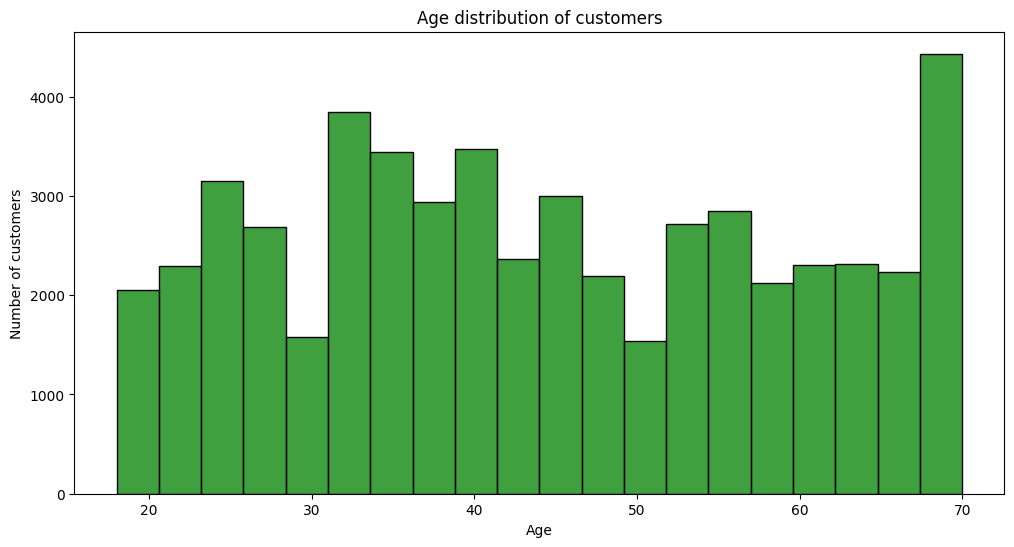

Age distribution of customers by age range:
Age range: 18-25, number of customers: 5859
Age range: 26-30, number of customers: 4912
Age range: 31-35, number of customers: 5818
Age range: 36-40, number of customers: 6503
Age range: 41-50, number of customers: 9907
Age range: 51-60, number of customers: 9225
Age range: 60+, number of customers: 11279


In [6]:

import seaborn as sns
import pandas as pd

# Create age ranges using pd.cut()
age_bins = [18, 25, 30, 35, 40, 50, 60, 100]  # Define age ranges (you can adjust as needed)
age_labels = ['18-25', '26-30', '31-35', '36-40', '41-50', '51-60', '60+']

# Add a new column for age groups
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate Age Group Distribution
age_group_distribution = data['Age Group'].value_counts().sort_index()

# Plot Age Distribution as a Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], kde=False, color='green', bins=20)  # bins can be adjusted
plt.title('Age distribution of customers')
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.show()

# Print Age distribution by groups/ranges
print('Age distribution of customers by age range:')
for age_range, count in age_group_distribution.items():
    print(f'Age range: {age_range}, number of customers: {count}')




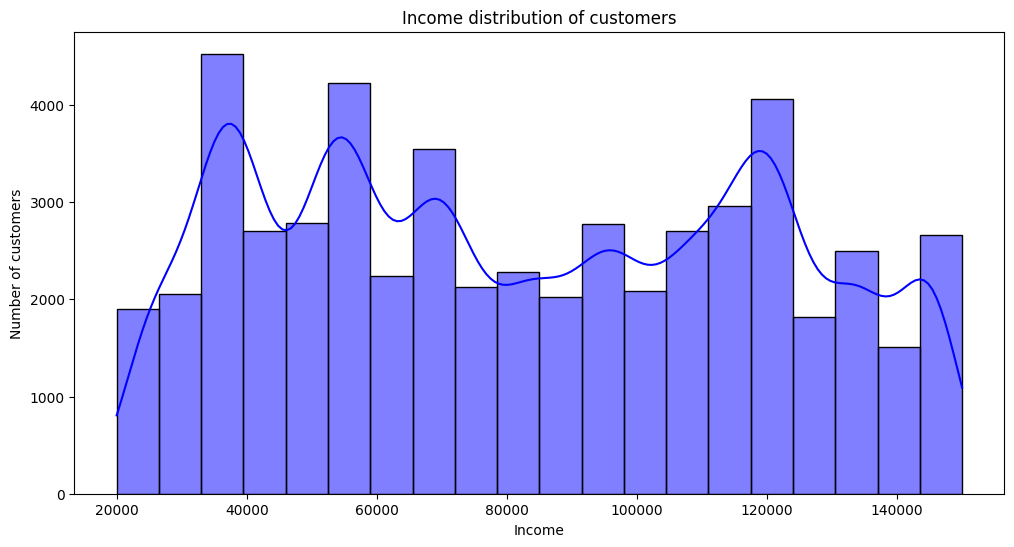

Income distribution data by ranges:
Income range: 0-30k, number of customers: 2884
Income range: 30k-50k, number of customers: 9673
Income range: 50k-70k, number of customers: 10301
Income range: 70k-100k, number of customers: 11079
Income range: 100k-140k, number of customers: 16036
Income range: 140k+, number of customers: 3530


In [28]:

import seaborn as sns


# Define expanded income ranges
income_bins = [0, 30000, 50000, 70000, 100000, 140000, float('inf')]  # Add 100k to 140k and beyond
income_labels = ['0-30k', '30k-50k', '50k-70k', '70k-100k', '100k-140k', '140k+']

# Create a new column for income ranges
data['Income Range'] = pd.cut(data['Income Level'], bins=income_bins, labels=income_labels, right=False)

# Plot Income Distribution (Histogram) with KDE
plt.figure(figsize=(12, 6))
sns.histplot(data['Income Level'], kde=True, color='blue', bins=20)  # kde=True adds the KDE curve
plt.title('Income distribution of customers')
plt.xlabel('Income')
plt.ylabel('Number of customers')
plt.show()

# Print the distribution within income ranges
print("Income distribution data by ranges:")
income_range_distribution = data['Income Range'].value_counts().sort_index()
for income_range, count in income_range_distribution.items():
    print(f'Income range: {income_range}, number of customers: {count}')



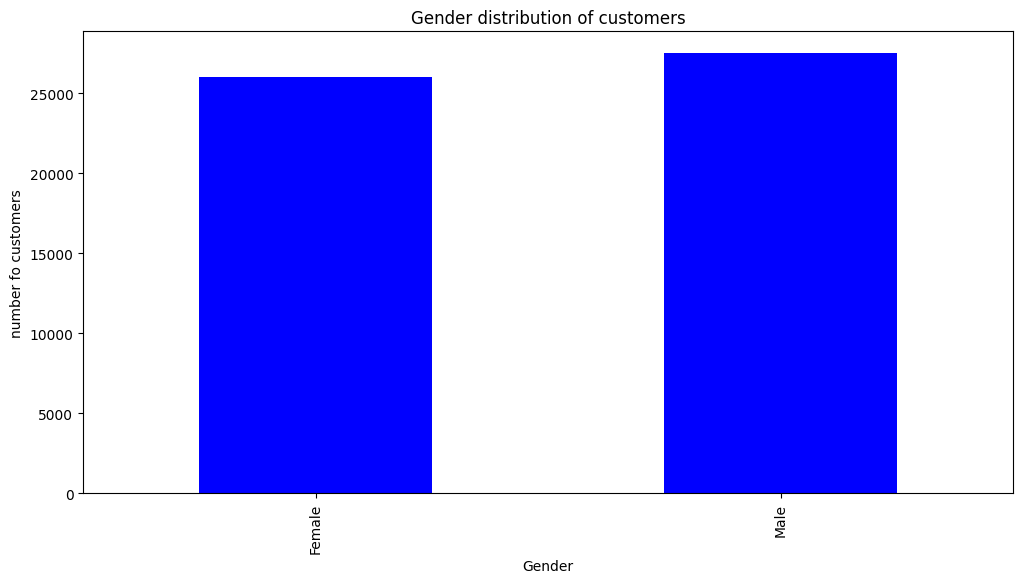

Gender Distribution of Customers
Gender: Female, numbers of customers : 26004
Gender: Male, numbers of customers : 27499


In [9]:
# plot the gender Distribution
gender_distribution=data['Gender'].value_counts().sort_index()
plt.figure(figsize=(12,6))
gender_distribution.plot(kind='bar', color='blue')
plt.title('Gender distribution of customers')
plt.xlabel('Gender')
plt.ylabel('number fo customers')
plt.show()
# print gender distribution of customers
print('Gender Distribution of Customers')
for gender , count in gender_distribution.items():
    print(f'Gender: {gender}, numbers of customers : {count}')

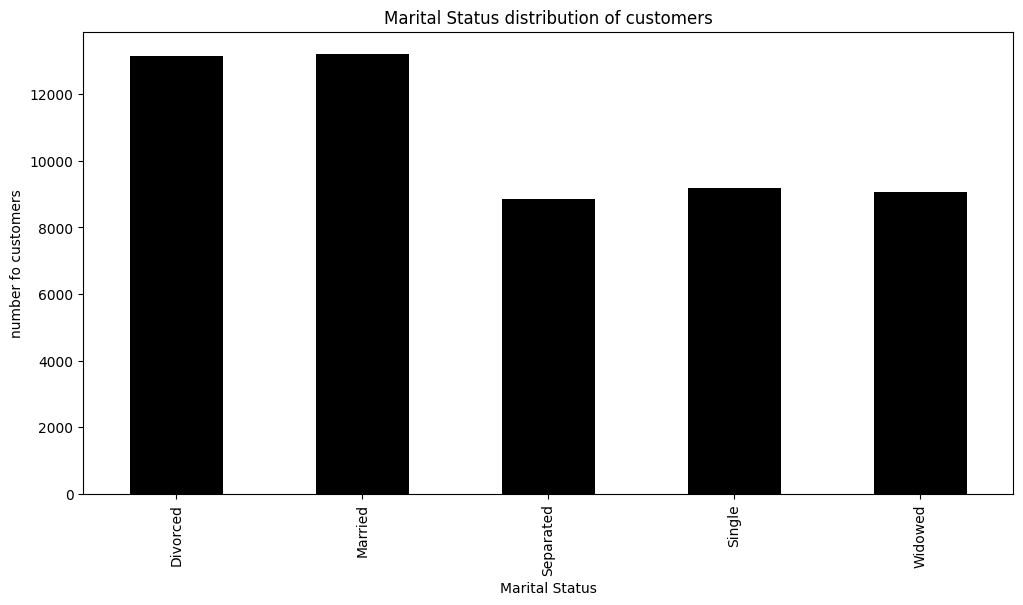

Marital Status Distribution of Customers
Marital Status: Divorced, numbers of customers : 13151
Marital Status: Married, numbers of customers : 13219
Marital Status: Separated, numbers of customers : 8861
Marital Status: Single, numbers of customers : 9195
Marital Status: Widowed, numbers of customers : 9077


In [10]:
#plot the marital status Distribution
marital_status_distribution=data['Marital Status'].value_counts().sort_index()
plt.figure(figsize=(12,6))
marital_status_distribution.plot(kind='bar', color='black')
plt.title('Marital Status distribution of customers')
plt.xlabel('Marital Status')
plt.ylabel('number fo customers')
plt.show()
# print Marital Status distribution of customers
print('Marital Status Distribution of Customers')
for Marital_Status , count in marital_status_distribution.items():
    print(f'Marital Status: {Marital_Status}, numbers of customers : {count}')

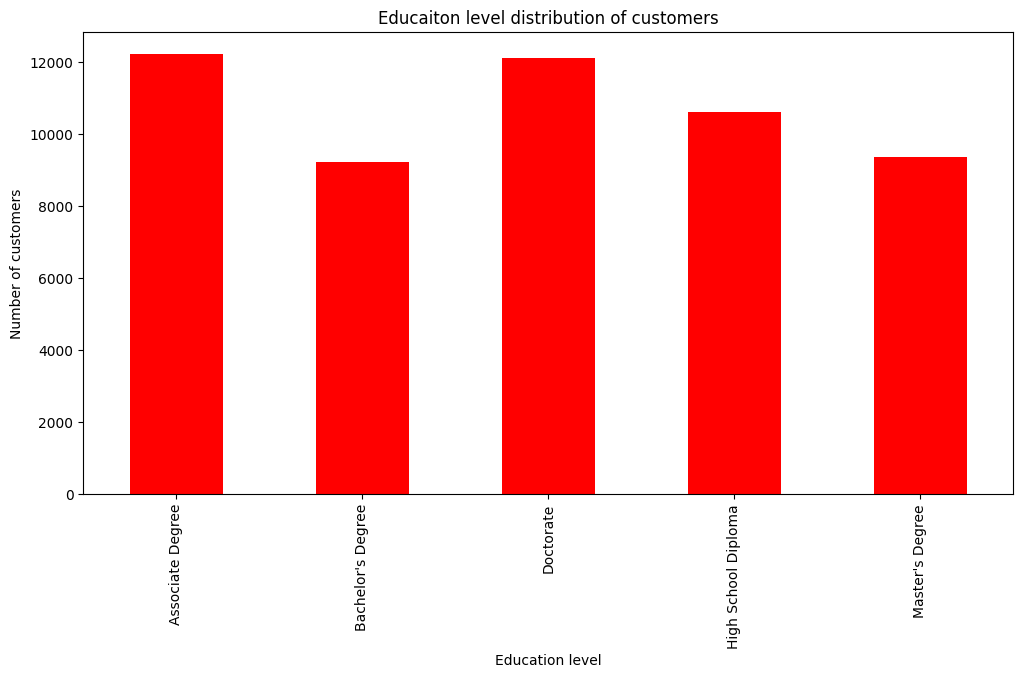

Education level distribution of customers:
Education level : Associate Degree, number of customer: 12213
Education level : Bachelor's Degree, number of customer: 9214
Education level : Doctorate, number of customer: 12103
Education level : High School Diploma, number of customer: 10607
Education level : Master's Degree, number of customer: 9366


In [11]:
# plot the EDucation level Distibution of customers
education_distribution=data['Education Level'].value_counts().sort_index()
plt.figure(figsize=(12,6))
education_distribution.plot(kind='bar', color='red')
plt.title('Educaiton level distribution of customers')
plt.xlabel('Education level')
plt.ylabel('Number of customers')
plt.show()
# pritn the Education level distribution of customers 
print('Education level distribution of customers:')
for education, count in education_distribution.items():
    print(f'Education level : {education}, number of customer: {count}')

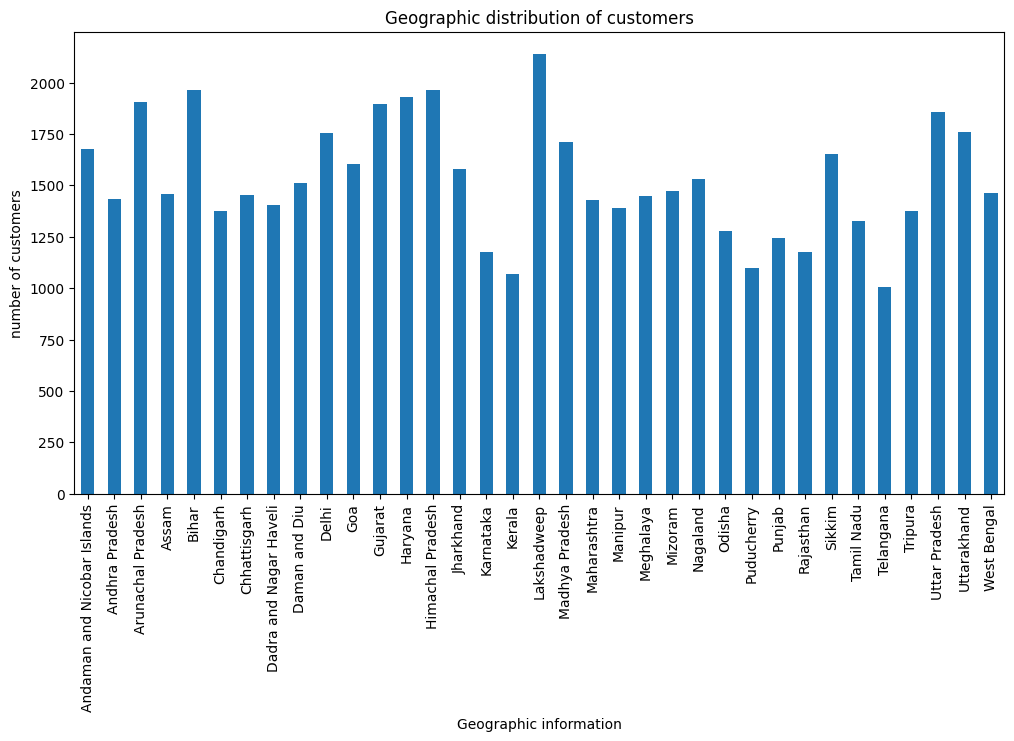

Geographic distribtuion of customers:
Geographic information: Andaman and Nicobar Islands, number of customers: 1678
Geographic information: Andhra Pradesh, number of customers: 1431
Geographic information: Arunachal Pradesh, number of customers: 1903
Geographic information: Assam, number of customers: 1460
Geographic information: Bihar, number of customers: 1962
Geographic information: Chandigarh, number of customers: 1376
Geographic information: Chhattisgarh, number of customers: 1451
Geographic information: Dadra and Nagar Haveli, number of customers: 1403
Geographic information: Daman and Diu, number of customers: 1512
Geographic information: Delhi, number of customers: 1756
Geographic information: Goa, number of customers: 1605
Geographic information: Gujarat, number of customers: 1895
Geographic information: Haryana, number of customers: 1931
Geographic information: Himachal Pradesh, number of customers: 1963
Geographic information: Jharkhand, number of customers: 1578
Geographic

In [12]:
# plot the geographic distribution of customers
geo_distribution=data['Geographic Information'].value_counts().sort_index()
plt.figure(figsize=(12,6))
geo_distribution.plot(kind='bar')
plt.title('Geographic distribution of customers')
plt.xlabel('Geographic information')
plt.ylabel('number of customers')
plt.show()
# print the geographic distribution of customers
print('Geographic distribtuion of customers:')
for geo, count in geo_distribution.items():
    print(f'Geographic information: {geo}, number of customers: {count}')

Segmentation Algorithm Implementation

preprocessing

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [8]:
print(data.columns)


Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group',
       'Age Group'],
      dtype='object')


In [9]:

data.drop(['Purchase History'], axis=1, inplace=True)
def model_evaluation(x, y, models):
    '''
        This function takes x, y and models and applies 
        k-fold cross validation to the each algorithm in 
        the models list by using x and y training set. 
        Displays the mean and standard deviation of 
        accuracy, precision, recall, f1 scores in tabular
        format and boxplots.

        ---
        ### Parameters
        - x <array>: Feature values.
        - y <array>: Target values.
        - models <list>: List of the model objects to be vealuated.
    '''
    
    names = []
    scoring = ['accuracy']
    # Create a dataframe to store the different metric values for each algorithm
    df_results = pd.DataFrame(columns=['Algorithm', 'Acc Mean', 'Acc STD'])
    results_acc = [] # List of accuracy scores for each fold of each algorithm
    
    for name, model in models:
        names.append(name)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
        result = cross_validate(model, x, y, cv=kfold, scoring=scoring)
    
        # Mean and standard deviation of Accuracy scores for the algorithm
        acc_mean = result['test_accuracy'].mean()
        acc_std = result['test_accuracy'].std()
        
        # Create the row of the results
        df_result_row = {'Algorithm': name, 'Acc Mean': acc_mean, 'Acc STD': acc_std}
        # Add the row to the results data frame
        df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)
        
        results_acc.append(result['test_accuracy'])
        
    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # Display the mean and standard deviation of all metrics for all algorithms
    print(df_results)
    
    # Display the overall results in a boxplot graph
    width = (len(models)*2)
    plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(width, 6))
    fig, ax = plot_objects
    
    ax.boxplot(results_acc)
    ax.set_title('Accuracy', fontsize=14)
    ax.set_xticklabels(names, rotation=30)
    plt.tight_layout()
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
lbl_encoder = LabelEncoder()
data['Segmentation Group Encoded'] = lbl_encoder.fit_transform(data['Segmentation Group'])
data['Segmentation Group Encoded'].value_counts()

Segmentation Group Encoded
4    13976
1    11442
3    10125
2     9277
0     8683
Name: count, dtype: int64

In [12]:
x = data.drop(['Segmentation Group', 'Segmentation Group Encoded'], axis=1)
y = data['Segmentation Group Encoded']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [13]:
print(x_train.columns)
print([col for col in x_train.columns if 'Segmentation' in col])


Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Interactions with Customer Service',
       'Insurance Products Owned', 'Coverage Amount', 'Premium Amount',
       'Policy Type', 'Customer Preferences',
       'Preferred Communication Channel', 'Preferred Contact Time',
       'Preferred Language', 'Age Group'],
      dtype='object')
[]


In [14]:
# Identify categorical columns in x_train
cat_features = x_train.select_dtypes(include=['object']).columns.tolist()
num_features = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical features:", cat_features)



Categorical features: ['Gender', 'Marital Status', 'Education Level', 'Geographic Information', 'Occupation', 'Behavioral Data', 'Interactions with Customer Service', 'Insurance Products Owned', 'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language']


In [15]:
cat_features = [col for col in cat_features if col in x_train.columns]


In [16]:
print("Categorical Features:", cat_features)
print("Numerical Features:", num_features)
print("x_train Columns:", x_train.columns)


Categorical Features: ['Gender', 'Marital Status', 'Education Level', 'Geographic Information', 'Occupation', 'Behavioral Data', 'Interactions with Customer Service', 'Insurance Products Owned', 'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language']
Numerical Features: ['Customer ID', 'Age', 'Income Level', 'Coverage Amount', 'Premium Amount']
x_train Columns: Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Interactions with Customer Service',
       'Insurance Products Owned', 'Coverage Amount', 'Premium Amount',
       'Policy Type', 'Customer Preferences',
       'Preferred Communication Channel', 'Preferred Contact Time',
       'Preferred Language', 'Age Group'],
      dtype='object')


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Apply transformations only to existing columns
preprocessor = ColumnTransformer([
    ("num", numerical_transformer, [col for col in num_features if col in x_train.columns]),
    ("cat", categorical_transformer, [col for col in cat_features if col in x_train.columns])
])

# Fit and transform
preprocessor.fit(x_train)
x_train_transformed = preprocessor.transform(x_train)


k-means(elbow-method)  AND SILHOUTE SCORE AND DBSCAN AND HIRERCHIAL SCAN

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
# Assuming x_train_transformed is already preprocessed
print(f"Shape of Transformed Data: {x_train_transformed.shape}")

Shape of Transformed Data: (42802, 87)


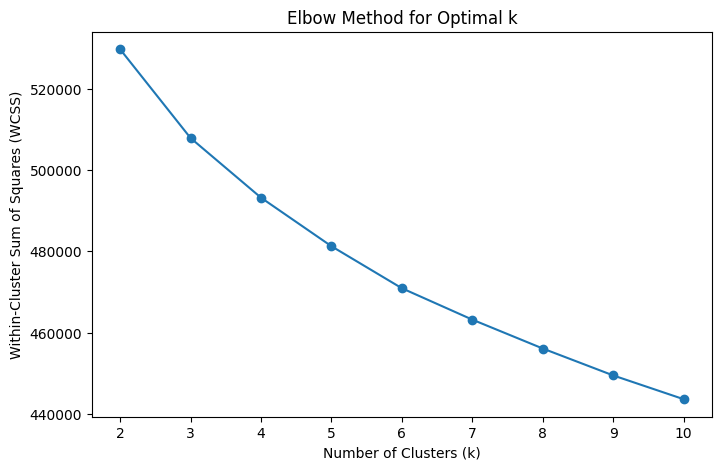

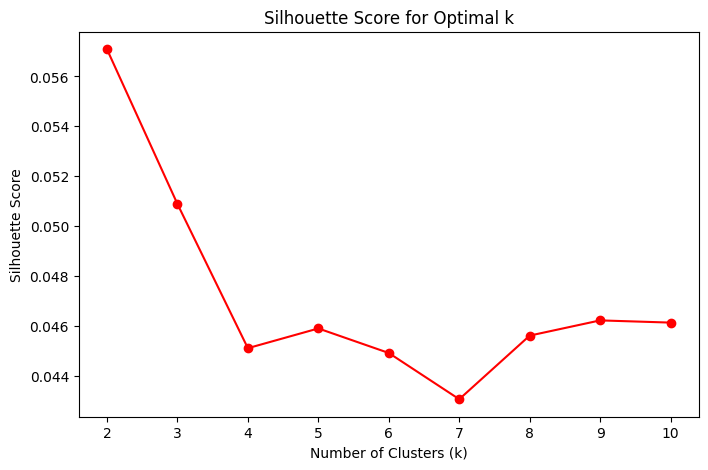

Optimal Number of Clusters for K-Means: 2


In [27]:
from sklearn.metrics import silhouette_score
import warnings
import os
os.environ['LOKY_MAX_CPU_COUNT']='6' 
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x_train_transformed)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_train_transformed, labels))

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

# Get the optimal k (highest silhouette score)
optimal_kmeans_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters for K-Means: {optimal_kmeans_k}")


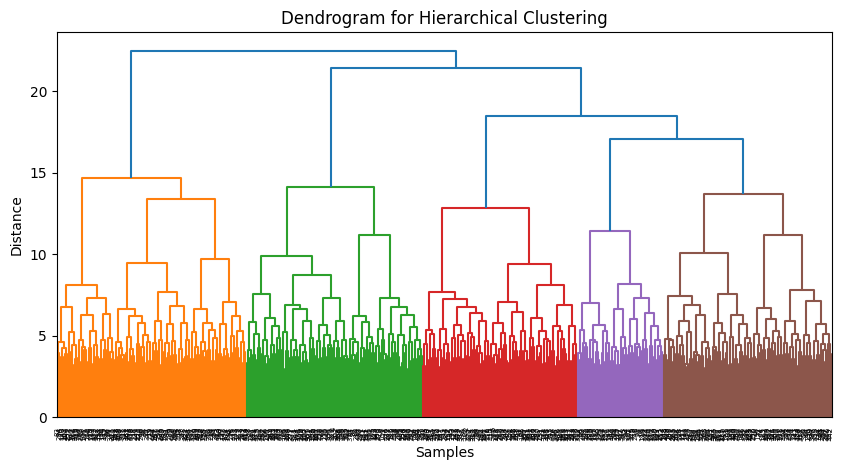

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 5))
linkage_matrix = linkage(x_train_transformed[:500], method='ward')  # Use a subset for efficiency
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
K_range = range(2, 11)  # Testing k values from 2 to 10

# Check silhouette scores for different k values
hier_silhouette_scores = []
for k in K_range:
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(x_train_transformed)
    hier_silhouette_scores.append(silhouette_score(x_train_transformed, labels))

# Get the optimal k (highest silhouette score)
optimal_hier_k = K_range[hier_silhouette_scores.index(max(hier_silhouette_scores))]
print(f"Optimal Number of Clusters for Hierarchical Clustering: {optimal_hier_k}")


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

# Use Hierarchical Clustering with automatic cluster selection
linked = linkage(x_train_transformed, method='ward')  # Compute linkage matrix

# Auto-determine the number of clusters using a threshold on the linkage matrix
max_d = 0.7 * max(linked[:, 2])  # Set threshold dynamically (adjust as needed)
hierarchical_labels = fcluster(linked, max_d, criterion='distance')

# Compute Silhouette Score for validation
optimal_clusters = len(set(hierarchical_labels))
print(f"Optimal number of clusters (Hierarchical): {optimal_clusters}")

# Fit Agglomerative Clustering using the detected number of clusters
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical_labels = hierarchical.fit_predict(x_train_transformed)


Optimal number of clusters (Hierarchical): 4


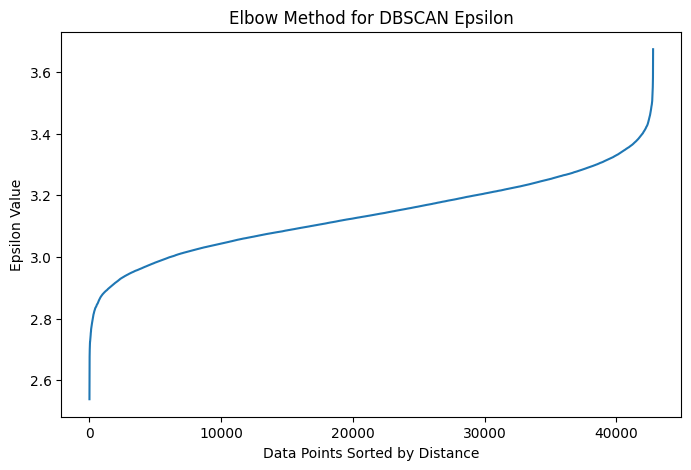

DBSCAN Unique Clusters (including noise -1): {-1}


In [28]:
from sklearn.neighbors import NearestNeighbors

# Find optimal epsilon using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(x_train_transformed)
distances, indices = neighbors_fit.kneighbors(x_train_transformed)
distances = np.sort(distances[:, -1])

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("Epsilon Value")
plt.title("Elbow Method for DBSCAN Epsilon")
plt.show()

# Choosing an estimated epsilon from the elbow point manually
estimated_eps = 2.0  # Adjust based on the plot

dbscan = DBSCAN(eps=estimated_eps, min_samples=5)
dbscan_clusters = dbscan.fit_predict(x_train_transformed)

unique_labels = set(dbscan_clusters)
print(f"DBSCAN Unique Clusters (including noise -1): {unique_labels}")


CLUSTERING QUALITY VISUALIZATION AND  EVALUATION


PCA AND TSNE

In [54]:
from sklearn.decomposition import PCA

In [55]:
# Defining the number of principal components to generate
n = x_train_transformed.shape[1]

# Finding principal components for the data
pca = PCA(n_components=n, random_state=101)

data_pca1 = pd.DataFrame(pca.fit_transform(x_train_transformed))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

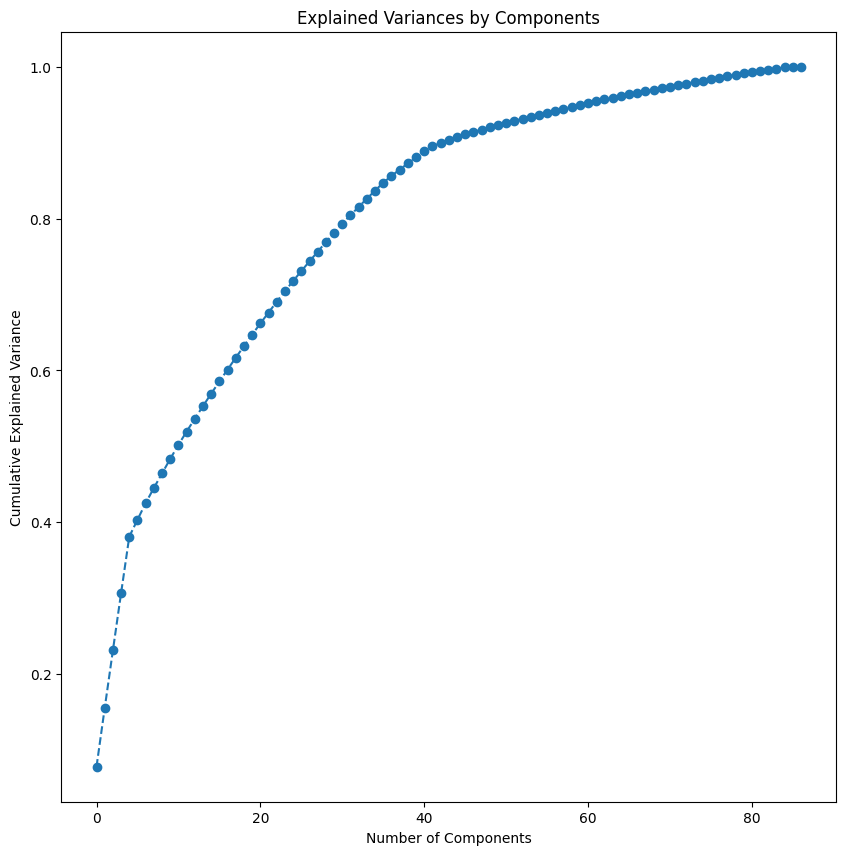

In [56]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [57]:
data_pca1.shape

(42802, 87)

In [58]:
# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance:", ix+1)
        break

Number of PCs that explain at least 70% variance: 24


In [59]:
labels = ['PC' + str(x) for x in range(1, (ix+2))]
labels

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24']

In [60]:
data_pca1.iloc[:, :24].shape

(42802, 24)

C:\Users\ghosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


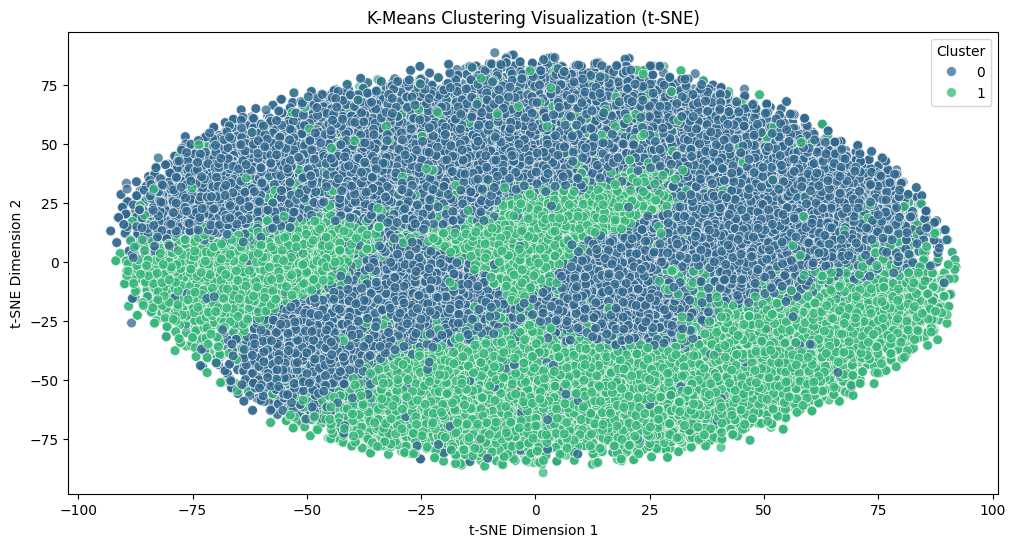

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Fit KMeans if not already done
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_train_transformed)

# Get cluster labels
kmeans_labels = kmeans.labels_

# Step 2: Apply PCA before t-SNE (recommended for high-dimensional data)
pca = PCA(n_components=50)  # Reduce to 50 dimensions first if needed
x_pca = pca.fit_transform(x_train_transformed)

# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
x_tsne = tsne.fit_transform(x_pca)

# Step 4: Visualize Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], hue=kmeans_labels, palette='viridis', s=50, alpha=0.75)
plt.title("K-Means Clustering Visualization (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()
